# Exploratory Data Analysis : The Olympics

## Introduction

Today, we embark on a journey through the rich Olympic history, exploring the remarkable achievements captured in the Olympic medals data. From the inaugural games in Athens 1896 to the latest spectacle in Beijing 2022, we'll dive into the stories behind the diverse medals won. This exploration will not only celebrate the triumphs of athletes but also offer a window into the evolving landscape of our world through the lens of sports.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/r7/qnp4t1ls5z9b262kt7qlc8fm0000gp/T/ipykernel_2551/1837149555.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("olympic_medals.csv")

## Overview of the dataset

In [3]:
data

,Olympiad,Discipline,Event,Winner,Medal_type,Olympic_city,Olympic_year,Olympic_season,Gender,Code,Committee,Committee_type
0,Athina 1896,Artistic Gymnastics,"Horizontal Bar, Men",Hermann Weingärtner,Gold,Athens,1896,summer,Men,GER,Germany,Country
1,Athina 1896,Artistic Gymnastics,"Horizontal Bar, Men",Alfred Flatow,Silver,Athens,1896,summer,Men,GER,Germany,Country
2,Athina 1896,Artistic Gymnastics,"Horizontal Bar, Teams, Men",Germany,Gold,Athens,1896,summer,Men,GER,Germany,Country
3,Athina 1896,Artistic Gymnastics,"Horse Vault, Men",Hermann Weingärtner,Bronze,Athens,1896,summer,Men,GER,Germany,Country
4,Athina 1896,Artistic Gymnastics,"Horse Vault, Men",Carl Schuhmann,Gold,Athens,1896,summer,Men,GER,Germany,Country
...,...,...,...,...,...,...,...,...,...,...,...,...
20428,Beijing 2022,Speed Skating,"Team Pursuit (6 laps), Women",Canada,Gold,Beijing,2022,winter,Women,CAN,Canada,Country
20429,Beijing 2022,Speed Skating,"Team Pursuit (6 laps), Women",Japan,Silver,Beijing,2022,winter,Women,JPN,Japan,Country
20430,Beijing 2022,Speed Skating,"Team Pursuit (8 laps), Men",United States,Bronze,Beijing,2022,winter,Men,USA,United States,Country
20431,Beijing 2022,Speed Skating,"Team Pursuit (8 laps), Men",Norway,Gold,Beijing,2022,winter,Men,NOR,Norway,Country


# General observations

In [4]:
data.describe()

,Olympic_year
count,20433.000000
mean,1979.026575
std,33.683661
min,1896.000000
25%,1960.000000
50%,1988.000000
75%,2008.000000
max,2022.000000


In [5]:
data.columns

Index(['Olympiad', 'Discipline', 'Event', 'Winner', 'Medal_type',
       'Olympic_city', 'Olympic_year', 'Olympic_season', 'Gender', 'Code',
       'Committee', 'Committee_type'],
      dtype='object')

### How many countries are represented in this dataset ?

In [6]:
print(f'There are {len(list(data["Code"].unique()))} countries represented in this dataset.')

There are 153 countries represented in this dataset.


### Athletes

In [7]:
# Counting the total of athletes with their gender as "Men"
total_men = data[data["Gender"] == "Men"]["Gender"].value_counts().iloc[0]
# Counting the total of athletes with their gender as "Women"
total_women = data[data["Gender"] == "Women"]["Gender"].value_counts().iloc[0]

# Counting the total of athletes with their gender as "Men" who have won Gold medals
total_men_gold = data[(data["Gender"] == "Men") & (data["Medal_type"] == "Gold")]["Medal_type"].value_counts().iloc[0]
# Counting the total of athletes with their gender as "Men" who have won Gold medals
total_women_gold = data[(data["Gender"] == "Women") & (data["Medal_type"] == "Gold")]["Medal_type"].value_counts().iloc[0]


print(f'Among all the different athletes: {total_men} are men and {total_women} are women.')
print(f'Men won {total_men_gold} gold medals and women won {total_women_gold} golden medals.')


Among all the different athletes: 13243 are men and 5949 are women.
Men won 4307 gold medals and women won 1948 golden medals.


### Countries' records

### Top 5 of the countries with the most Olympic medals won 

In [8]:
# Counting the total of medals won per country
# displaying only the first 5 of the list
data["Committee"].value_counts().head()

Committee
United States    2985
Soviet Union     1204
Germany          1083
Great Britain     965
France            910
Name: count, dtype: int64

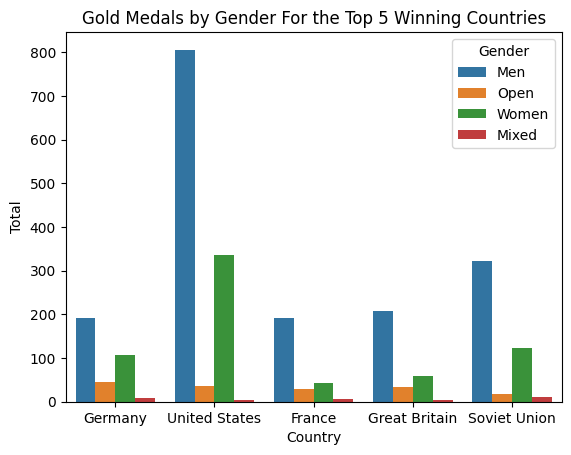

In [9]:
# Filtering the data for the top 5 and gold medals
countries = ["United States", "Soviet Union", "Germany", "Great Britain", "France"]
filtered_data = data[(data["Medal_type"] == "Gold") & (data["Committee"].isin(countries))]

sns.countplot(data=filtered_data, x="Committee", hue="Gender")
plt.title("Gold Medals by Gender For the Top 5 Winning Countries")
plt.xlabel("Country")
plt.ylabel("Total")
plt.show()

### Observations

Men have considerably won more gold medals than any other gender. This could be explained by the fact that sports remains until this day a field mostly dominated by men. We can, however, notice that some countries such as Germany has a smaller gap between the two dominating genders : men and women. Whereas the United States, on the other hand, have an enormous gap between its two dominating genders.

## Women's data

Now, let's look at when women joined to the Olympics, and what was their main disciplines.

In [10]:
# Filtering the data with only Women and the names of their disciplines
women_data = data[(data['Gender'] == "Women")]

# Resetting the index, droping the old index and replace it with a new default sequential index
women_data.reset_index(drop=True, inplace=True)

# Overview the women's data
women_data


,Olympiad,Discipline,Event,Winner,Medal_type,Olympic_city,Olympic_year,Olympic_season,Gender,Code,Committee,Committee_type
0,Paris 1900,Golf,"Individual, Women",Abbie Pratt,Bronze,Paris,1900,summer,Women,FRA,France,Country
1,Paris 1900,Golf,"Individual, Women",Margaret Abbott,Gold,Paris,1900,summer,Women,USA,United States,Country
2,Paris 1900,Golf,"Individual, Women",Polly Whittier,Silver,Paris,1900,summer,Women,SUI,Switzerland,Country
3,Paris 1900,Tennis,"Singles, Women",Hedwig Rosenbaum,Bronze,Paris,1900,summer,Women,BOH,Bohemia,Former committee
4,Paris 1900,Tennis,"Singles, Women",Marion Jones,Bronze,Paris,1900,summer,Women,USA,United States,Country
...,...,...,...,...,...,...,...,...,...,...,...,...
5944,Beijing 2022,Speed Skating,"Mass Start, Women",Irene Schouten,Gold,Beijing,2022,winter,Women,NED,Netherlands,Country
5945,Beijing 2022,Speed Skating,"Mass Start, Women",Ivanie Blondin,Silver,Beijing,2022,winter,Women,CAN,Canada,Country
5946,Beijing 2022,Speed Skating,"Team Pursuit (6 laps), Women",Netherlands,Bronze,Beijing,2022,winter,Women,NED,Netherlands,Country
5947,Beijing 2022,Speed Skating,"Team Pursuit (6 laps), Women",Canada,Gold,Beijing,2022,winter,Women,CAN,Canada,Country


### Observations

From this dataset we can clearly see that women joined the Olympics games from 1900, which is quite earlier than what I expected.

## Woman's disciplines

<Axes: xlabel='Discipline', ylabel='count'>

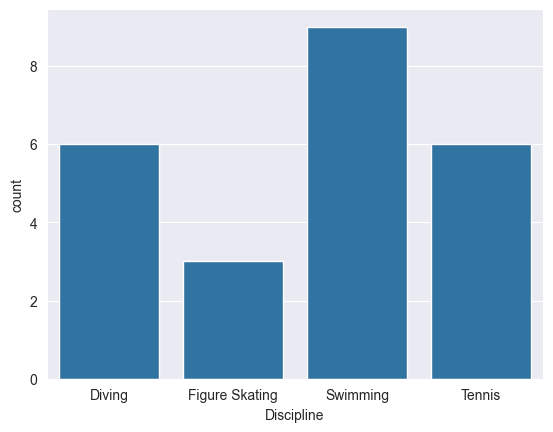

In [11]:
sns.set_style("darkgrid")

sns.countplot(
    data=women_data[women_data["Olympic_year"] == 1920], 
    x="Discipline"
)

In 2020, women athletes competed in 59 different disciplines.
It is 14 times more than a century ago, in 1920.


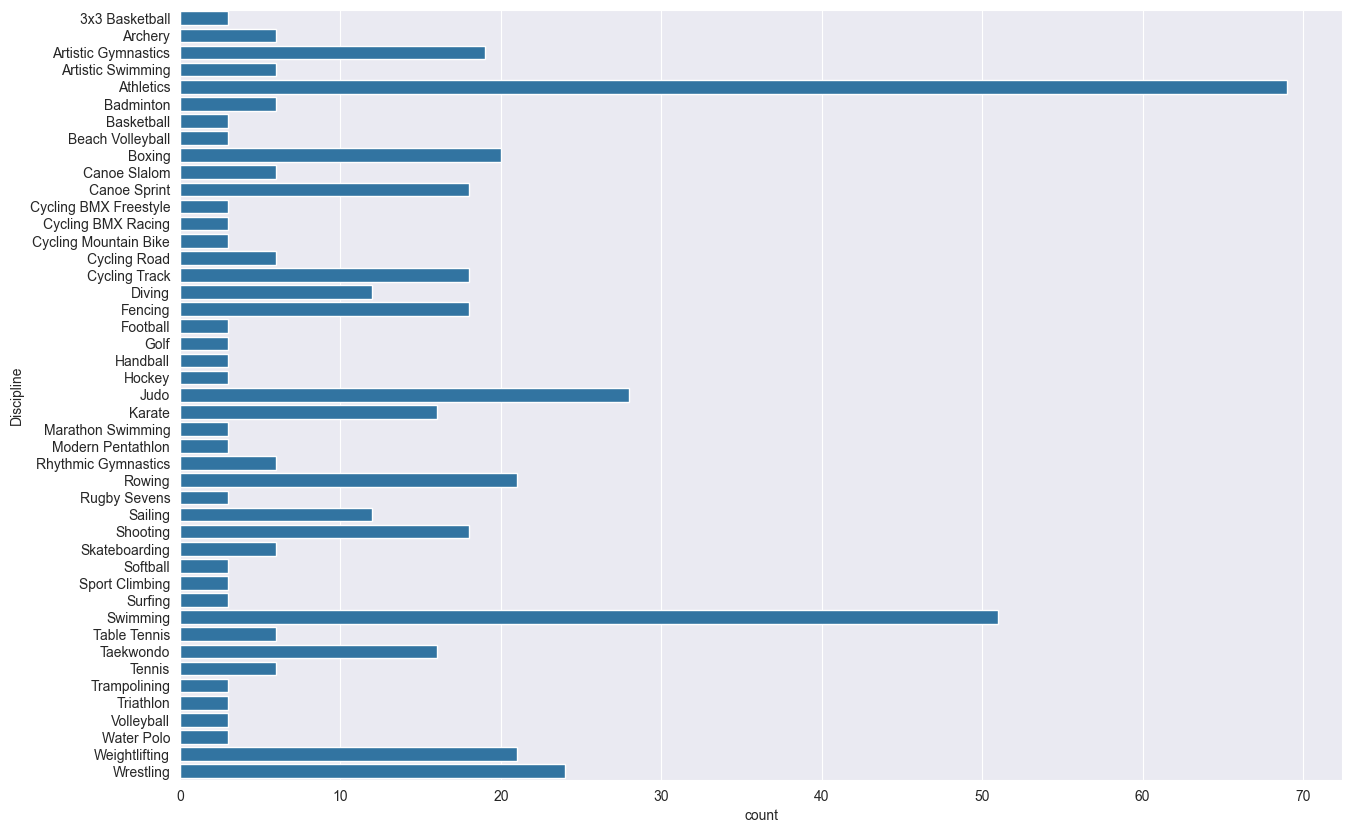

In [12]:

plt.figure(figsize=(15, 10))
sns.countplot(
    data=women_data[women_data["Olympic_year"] == 2020], 
    y="Discipline"
)

print(f'In 2020, women athletes competed in {len(list(women_data["Discipline"].unique()))} different disciplines.')
print(f'It is {(len(list(women_data["Discipline"].unique()))//4)} times more than a century ago, in 1920.')


## Women's countries

Over the course of a century a lot has changed and evolved for women in society but also in sports. Let's have a look at the different countries represented by women athletes.

In [13]:
# Renaming the column "Committee" into "Country" 
women_data.rename(columns={"Committee": "Country"}, inplace=True)

/var/folders/r7/qnp4t1ls5z9b262kt7qlc8fm0000gp/T/ipykernel_2551/2141746795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_data.rename(columns={"Committee": "Country"}, inplace=True)


In [14]:
# Counting the total of women athletes by country
committee_counts = women_data['Country'].value_counts()

# Filtering the data to include only rows where the "Olympic_year" column is less than 1920
women_data_before_1920 = women_data[women_data["Olympic_year"] < 1920]

# Creating a new dataframe of women's data from before 1930 for countries 
# with more than 80 counts in the committee_counts df
women_data_before_1940 = women_data[(women_data["Olympic_year"] < 1940) &  
    (women_data['Country'].isin(committee_counts[committee_counts > 80].index))]

# Creating a new dataframe of women's data from before 1940 for countries 
# with more than 80 occurrences in the committee_counts df
women_data_before_1960 = women_data[(women_data["Olympic_year"] < 1960) &  
    (women_data['Country'].isin(committee_counts[committee_counts > 80].index))]

# Creating a new dataframe of women's data from before 1990 for countries 
# with more than 100 occurrences in the committee_counts df
women_data_before_1990 = women_data[(women_data["Olympic_year"] < 1990) &  
    (women_data['Country'].isin(committee_counts[committee_counts > 80].index))]


## Vizualisation of different time periods

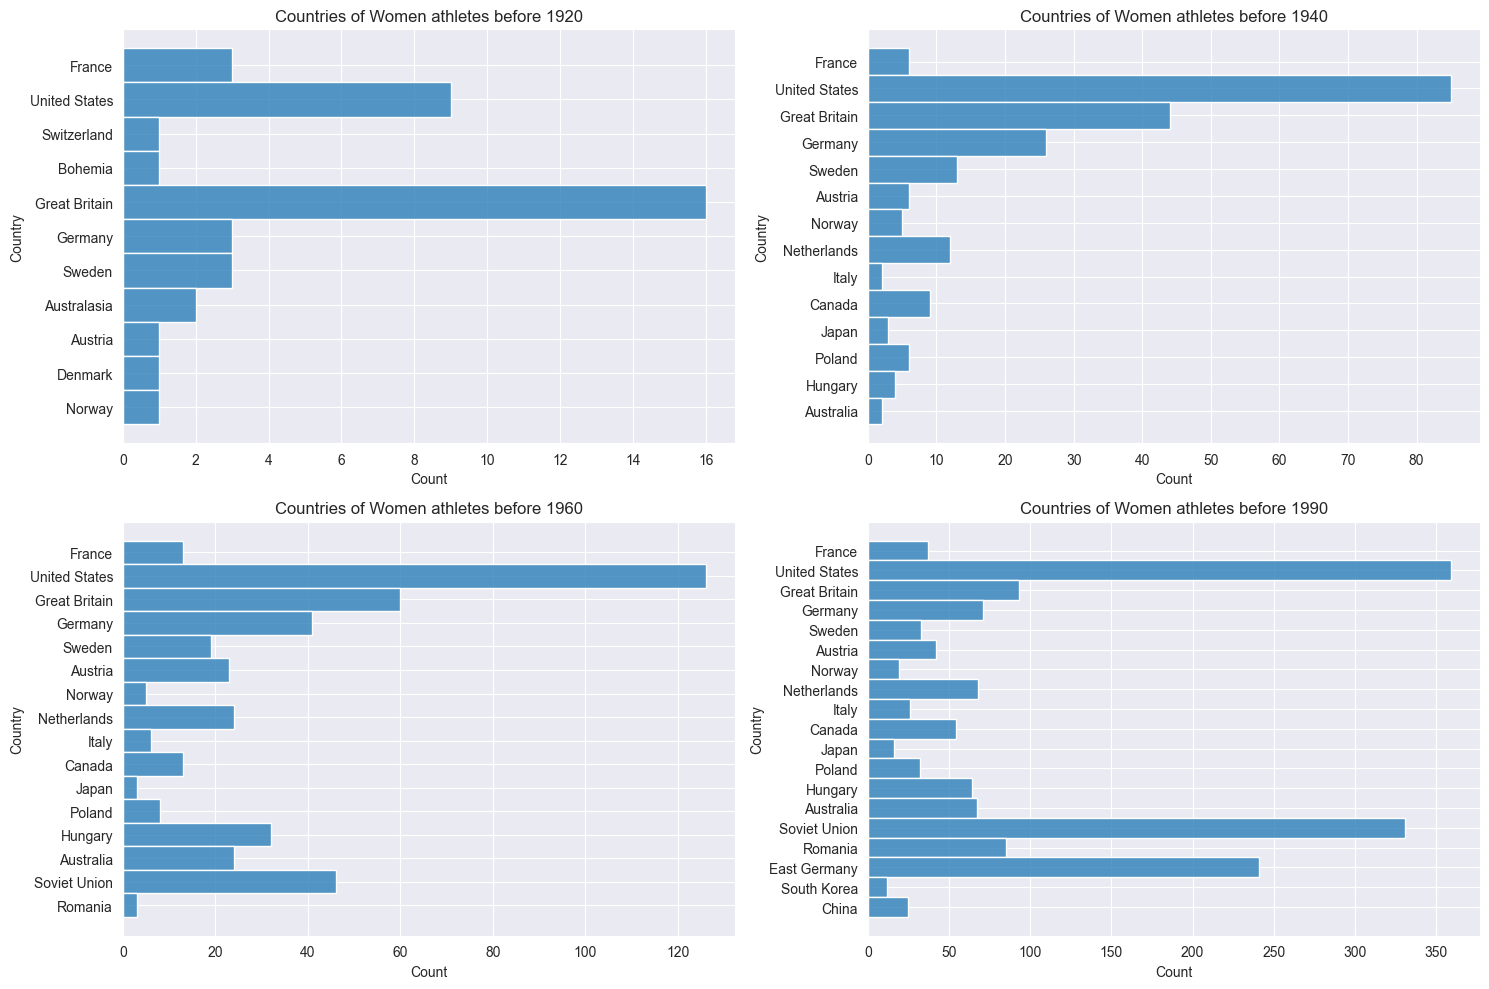

In [15]:

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot histogram for  countries of Women athletes before 1920.
sns.histplot(
    data=women_data_before_1920, 
    y = "Country",    
    ax=axes[0, 0]
)
axes[0, 0].set_title('Countries of Women athletes before 1920')

# Plot histogram for  countries of Women athletes before 1940.
sns.histplot(
    data=women_data_before_1940, 
    y = "Country",    
    ax=axes[0, 1]
)
axes[0, 1].set_title('Countries of Women athletes before 1940')

# Plot histogram for  countries of Women athletes before 1960.
sns.histplot(
    data=women_data_before_1960, 
    y = "Country",      
    ax=axes[1, 0]
)
axes[1, 0].set_title('Countries of Women athletes before 1960')

# Plot histogram for  countries of Women athletes before 1990.
sns.histplot(
    data=women_data_before_1990, 
    y = "Country",  
    ax=axes[1, 1]
)
axes[1, 1].set_title('Countries of Women athletes before 1990')


# Adjust layout to prevent overlapping
plt.tight_layout()

## Observations

We can clearly see that in the beginning of the 20th century women athletes mostly came from European countries, the UK being the number 1 between 1896 and 1920. Through the century as the world also changed, more and more countries starting to be represented by women athletes.